In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline

In [5]:
df = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\datasets\lower backpain symptoms.csv")
df.head(5)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [6]:
df.columns

Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10', 'Col11', 'Col12', 'Class_att', 'Unnamed: 13'],
      dtype='object')

In [7]:
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [9]:
print(df.isnull().sum().sum())
df.isnull().sum()

296


Col1             0
Col2             0
Col3             0
Col4             0
Col5             0
Col6             0
Col7             0
Col8             0
Col9             0
Col10            0
Col11            0
Col12            0
Class_att        0
Unnamed: 13    296
dtype: int64

In [12]:
df.drop(columns='Unnamed: 13',inplace=True)
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [15]:
df['Class_att'].value_counts()

Abnormal    210
Normal      100
Name: Class_att, dtype: int64

In [20]:
df['Class_att'] = np.where(df['Class_att']=='Normal', 1, 0)
df.head(5)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,0


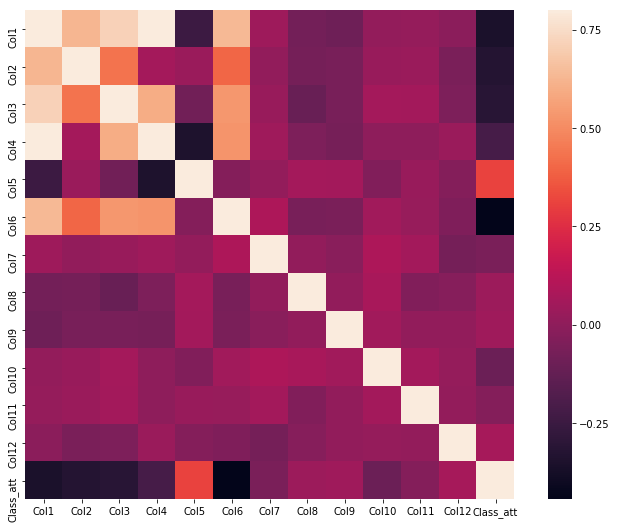

In [44]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

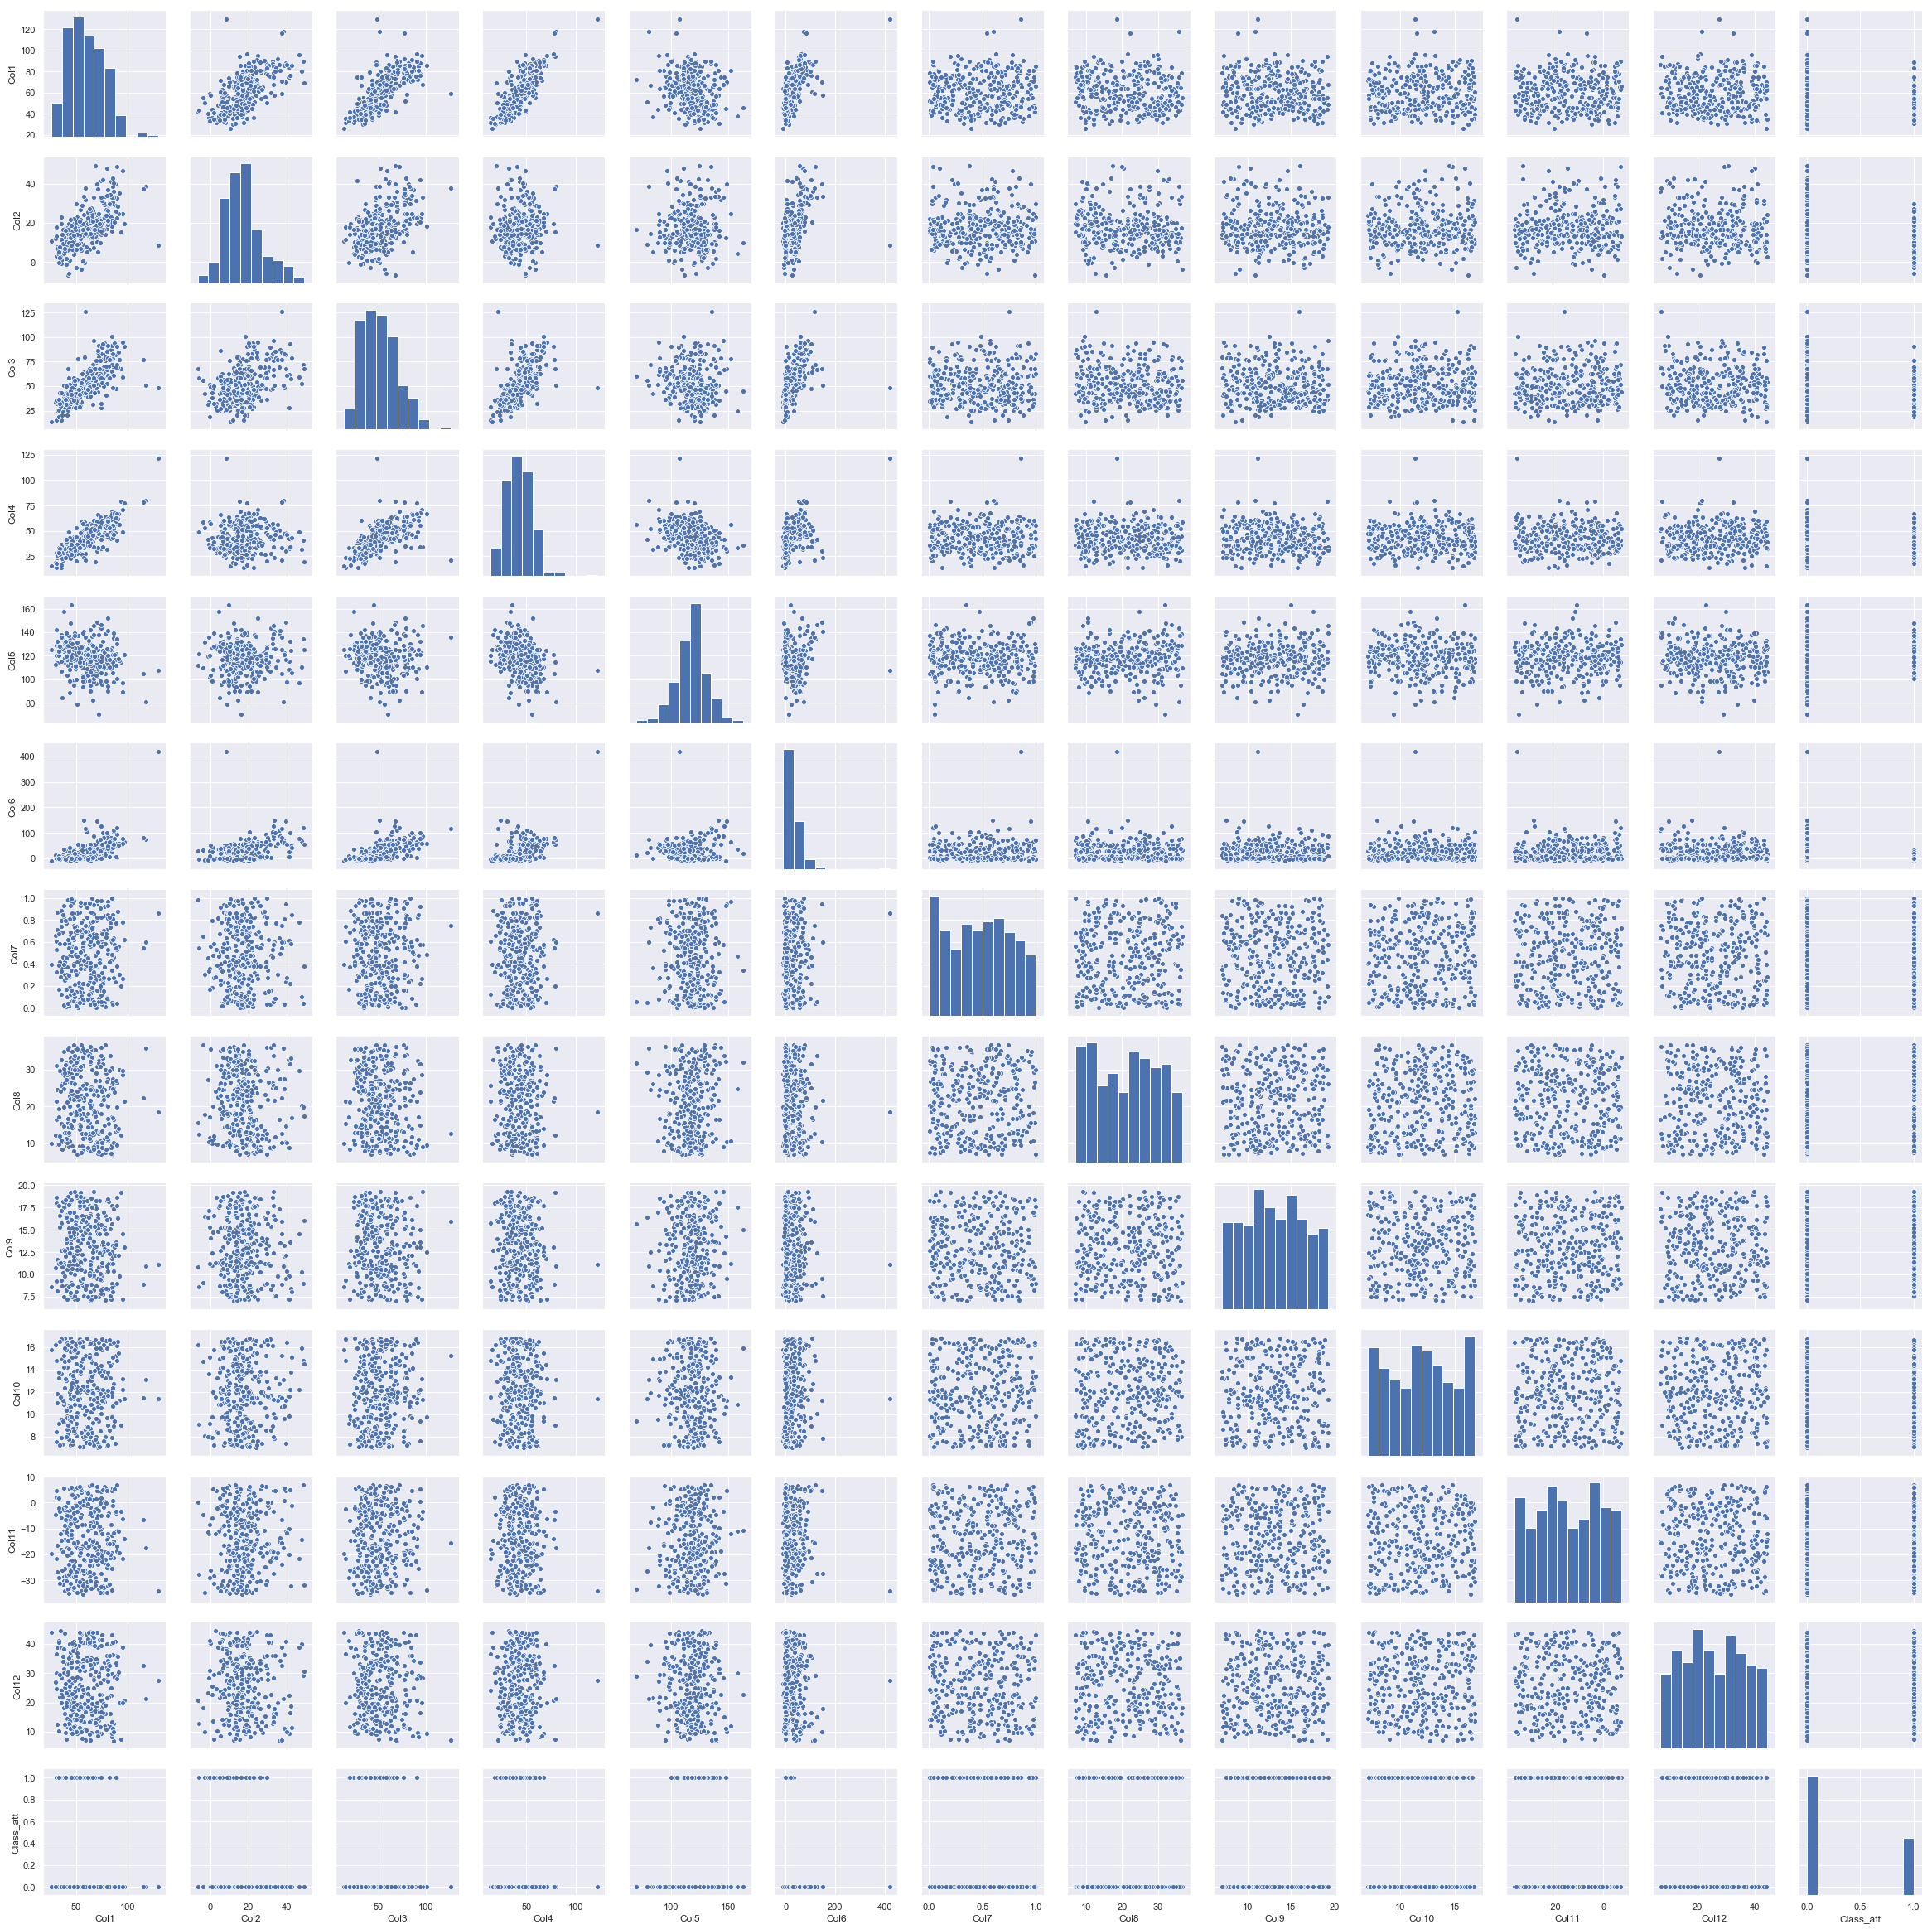

In [46]:
sns.set()
#cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Pressure9am', 'Temp9am','RISK_MM']
sns.pairplot(df, height = 2.5)
plt.show();

In [27]:
from sklearn.model_selection import train_test_split
X = df.loc[:, ~(df.columns).isin(['Class_att'])]
Y = df['Class_att'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=20)

In [43]:
#Logistic regression:
from sklearn import linear_model
lgr = linear_model.LogisticRegression(C=1e9)
lgr.fit(X_train, Y_train)
print('\nR²  for the logistic model:')
print(lgr.score(X_train, Y_train))
origparams = np.append(lgr.coef_, lgr.intercept_)
print('\nParameter estimates for the logistic model:')
print(origparams)
print(lgr.score(X_test, Y_test))
print(lgr.predict(X_test))

from sklearn.metrics import confusion_matrix
confusion_matrix(lgr.predict(X_test), Y_test)


R²  for the logistic model:
0.9112903225806451

Parameter estimates for the logistic model:
[-4.12937089e-03 -1.43084496e-01  9.49754689e-02  1.38949190e-01
  1.86687728e-01 -2.68263511e-01  3.50253672e-01  3.76630611e-02
 -5.83076834e-02 -2.40757482e-02 -5.97721897e-02  7.96673151e-03
 -2.88753033e+01]
0.8494623655913979
[0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0
 0]


c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[117,  16],
       [ 12,  41]], dtype=int64)

In [28]:
#Lasso regression:
from sklearn import linear_model
lass = linear_model.Lasso(alpha=0.1)
lass.fit(X_train, Y_train)
print('\nR²  for the lasso model:')
print(lass.score(X_train, Y_train))
origparams = np.append(lass.coef_, lass.intercept_)
print('\nParameter estimates  for the lasso model:')
print(origparams)
print(lass.score(X_test, Y_test))


R² for the model with many features:
0.40153313042232697

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.69192271e-03  2.58013666e-03  6.05104328e-03
  1.27087706e-02 -9.23202282e-03 -0.00000000e+00  8.59984480e-04
 -3.48125387e-03  0.00000000e+00  1.56319123e-03  8.95007848e-04
 -1.22967113e+00]
0.15573656000911895


In [33]:
#Ridge regression:
from sklearn import linear_model
rdge = linear_model.Ridge(alpha=100)
rdge.fit(X_train, Y_train)
print('\nR²  for the ridge model:')
print(rdge.score(X_train, Y_train))
origparams = np.append(rdge.coef_, rdge.intercept_)
print('\nParameter estimates for the ridge model:')
print(origparams)
print(rdge.score(X_test, Y_test))


R²  for the ridge model:
0.4095760201856461

Parameter estimates for the ridge model:
[ 4.66496090e-04 -6.03906910e-03  3.29636128e-03  6.50556492e-03
  1.36601534e-02 -9.45799514e-03 -7.18558255e-04  2.26729253e-03
 -1.16509707e-02  3.03027803e-03  2.45521058e-03  1.72254911e-03
 -1.34463871e+00]
0.11284802680176675


Comparing the scores of the above 3 models explains us that for Classification, it is best to use Logistic regression. Ridge and Lasso performed terribly and they cannot be implemented for classification purpose.